In [1]:
# importing libraries
import pandas as pd 
import numpy as np


In [2]:
# reading files into notebook
file_path = r"C:\Silomo_USB Files\Learning Material\The Forage_Simulations\Data Science\Tata_GenAI Powered Data Analytics\Task 1\copy.xlsx"
df = pd.read_excel(file_path)

print(df.head())


  Customer_ID  Age    Income  Credit_Score  Credit_Utilization  \
0    CUST0001   56  165580.0         398.0            0.390502   
1    CUST0002   69  100999.0         493.0            0.312444   
2    CUST0003   46  188416.0         500.0            0.359930   
3    CUST0004   32  101672.0         413.0            0.371400   
4    CUST0005   60   38524.0         487.0            0.234716   

   Missed_Payments  Delinquent_Account  Loan_Balance  Debt_to_Income_Ratio  \
0                3                   0       16310.0              0.317396   
1                6                   1       17401.0              0.196093   
2                0                   0       13761.0              0.301655   
3                3                   0       88778.0              0.264794   
4                2                   0       13316.0              0.510583   

  Employment_Status  Account_Tenure Credit_Card_Type     Location Month_1  \
0               EMP              18          Student  Los

In [3]:
df.describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure
count,500.000000,461.000000,498.000000,500.000000,500.000000,500.000000,471.000000,500.000000,500.000000
mean,46.266000,108379.893709,577.716867,0.491446,2.968000,0.160000,48654.428875,0.298862,9.740000
std,16.187629,53662.723741,168.881211,0.197103,1.946935,0.366973,29395.537273,0.094521,5.923054
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,612.000000,0.100000,0.000000
25%,33.000000,62295.000000,418.250000,0.356486,1.000000,0.000000,23716.500000,0.233639,5.000000
50%,46.500000,107658.000000,586.000000,0.485636,3.000000,0.000000,45776.000000,0.301634,10.000000
75%,59.250000,155734.000000,727.250000,0.634440,5.000000,0.000000,75546.500000,0.362737,15.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000


In [3]:
# 3. Missing Value Analysis
print("\n--- 2. MISSING DATA ANALYSIS ---")
missing = df.isnull().sum()

missing = missing[missing > 0]
print("Columns with Missing Values:")
print(missing)
# Calculate percentage of missing data
missing_percent = (missing / len(df)) * 100
print("\nPercentage Missing:")
print(missing_percent)


--- 2. MISSING DATA ANALYSIS ---
Columns with Missing Values:
Income          39
Credit_Score     2
Loan_Balance    29
dtype: int64

Percentage Missing:
Income          7.8
Credit_Score    0.4
Loan_Balance    5.8
dtype: float64


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 


--- 3. TARGET VARIABLE (Delinquent_Account) ---
Delinquent_Account
0    0.84
1    0.16
Name: proportion, dtype: float64


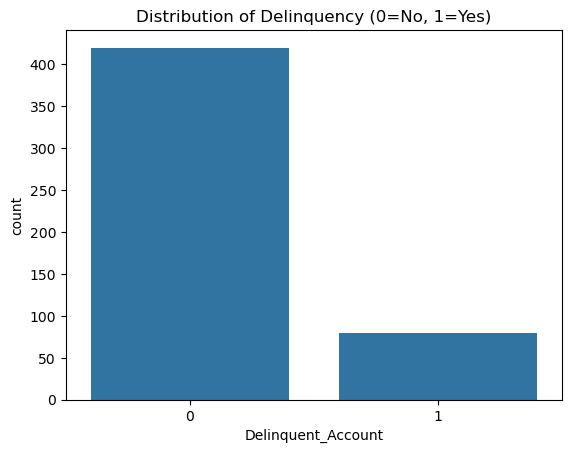

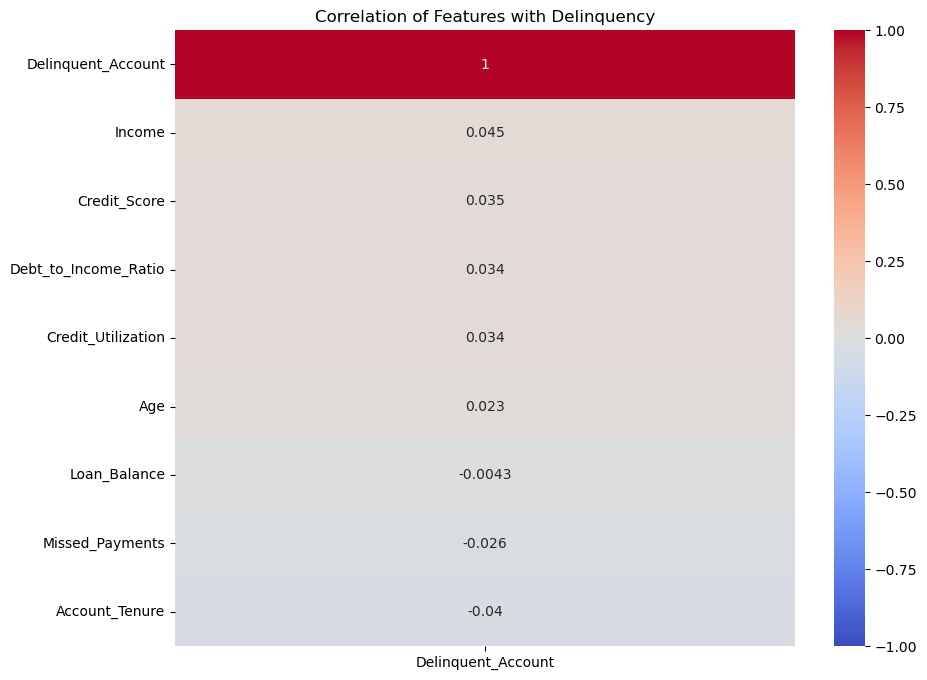

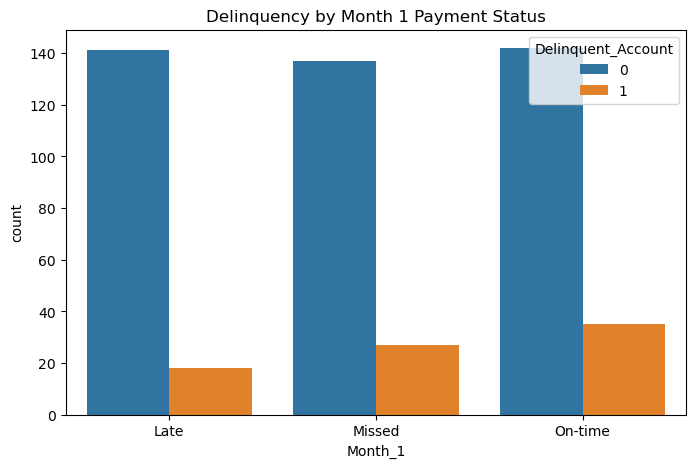

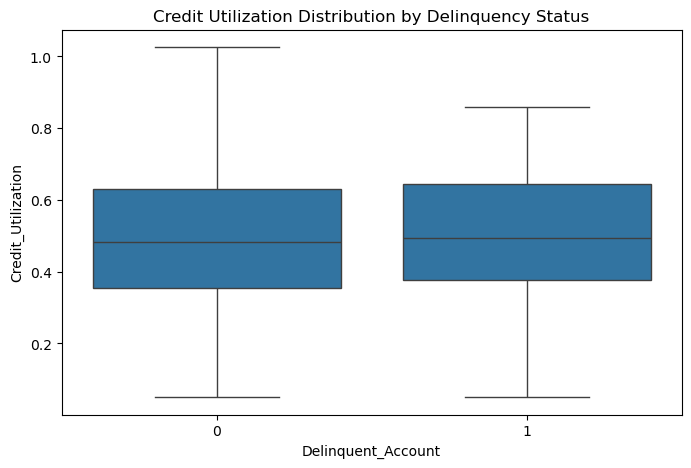

In [5]:
# 4. Target Variable Distribution
print("\n--- 3. TARGET VARIABLE (Delinquent_Account) ---")
print(df['Delinquent_Account'].value_counts(normalize=True))
sns.countplot(x='Delinquent_Account', data=df)
plt.title("Distribution of Delinquency (0=No, 1=Yes)")
plt.show()

# 5. Correlation Analysis (Risk Factors)
# We need to drop non-numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr[['Delinquent_Account']].sort_values(by='Delinquent_Account', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Features with Delinquency")
plt.show()

# 6. Categorical Risk Pattern (Payment History)
# Let's look at Month_1 (Most recent payment status)
plt.figure(figsize=(8, 5))
sns.countplot(x='Month_1', hue='Delinquent_Account', data=df)
plt.title("Delinquency by Month 1 Payment Status")
plt.show()

# 7. Credit Utilization vs Delinquency
plt.figure(figsize=(8, 5))
sns.boxplot(x='Delinquent_Account', y='Credit_Utilization', data=df)
plt.title("Credit Utilization Distribution by Delinquency Status")
plt.show()